# Projet de fin de formation 

### 1. importation bibiotheque et base de donnees

In [1]:
import matplotlib.pyplot as plt
import pandas  as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
import seaborn as sns
import statsmodels.api as sm
import warnings

warnings.filterwarnings('ignore')

In [2]:
missing_values=["na","-"]
cell=pd.read_excel('cellphone.xlsx',na_values=missing_values)#,index_col=[0],parse_dates=True)
cell.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


explication de la base de donnees

Il s'agit d'un jeu de données sur les caractéristiques et les prix des téléphones mobiles.

Il contient les variables suivantes :

• Product_id : un identifiant unique pour chaque téléphone 

• Price : le prix du téléphone en euros 

• Sale : le pourcentage de réduction appliqué au prix 

• weight : le poids du téléphone en grammes 

• resoloution : la taille de l'écran en pouces 

• ppi : le nombre de pixels par pouce de l'écran 

• cpu core : le nombre de cœurs du processeur 

• cpu freq : la fréquence du processeur en GHz 

• internal mem : la mémoire interne en Go 

• ram : la mémoire vive en Go 

• RearCam : le nombre de mégapixels de la caméra arrière 

• Front_Cam : le nombre de mégapixels de la caméra avant 

• battery : la capacité de la batterie en mAh 

• thickness : l'épaisseur du téléphone en mm

Le but de ce jeu de données est de prédire d’un téléphone mobile en fonction de ses caractéristiques

In [3]:
cell.columns=['idantifiant','prix','pourc_reduct','poids','taille_ecran',
              'n_pixel','cpu_coeur','cup_freq','memoire_int','ram',
              'n_megapixels','megapixels_avan','batterie','epaisseur']

In [4]:
cell

,idantifiant,prix,pourc_reduct,poids,taille_ecran,n_pixel,cpu_coeur,cup_freq,memoire_int,ram,n_megapixels,megapixels_avan,batterie,epaisseur
0,203,2357,10,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


Dans cette base de donnees 

In [5]:
print(f"dimension: {cell.shape}")

dimension: (161, 14)


Notre base de donnees est commposee de 161 types de telephones mobiles defini par ces 14 caracteristiques 

In [6]:
cell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   idantifiant      161 non-null    int64  
 1   prix             161 non-null    int64  
 2   pourc_reduct     161 non-null    int64  
 3   poids            161 non-null    float64
 4   taille_ecran     161 non-null    float64
 5   n_pixel          161 non-null    int64  
 6   cpu_coeur        161 non-null    int64  
 7   cup_freq         161 non-null    float64
 8   memoire_int      161 non-null    float64
 9   ram              161 non-null    float64
 10  n_megapixels     161 non-null    float64
 11  megapixels_avan  161 non-null    float64
 12  batterie         161 non-null    int64  
 13  epaisseur        161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


La base est composee que de variables numeriques dont 8 variables relles et 6 variables entiers 

detection des valeurs manquante

In [7]:
cell.isnull().sum()

idantifiant        0
prix               0
pourc_reduct       0
poids              0
taille_ecran       0
n_pixel            0
cpu_coeur          0
cup_freq           0
memoire_int        0
ram                0
n_megapixels       0
megapixels_avan    0
batterie           0
epaisseur          0
dtype: int64

On constate qu'il n'y a pas de valeurs manquantes dans la base de donnee ce qui est une bonne nouvelle en
 l'analyse de donnees. Puise qu'il n'y a pas de donnees manquantes notres analyse ne sera pas biaisé ni corrompue 

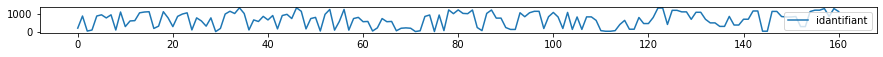

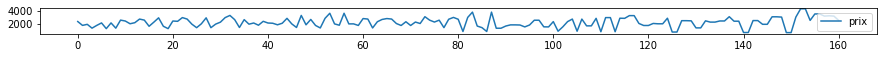

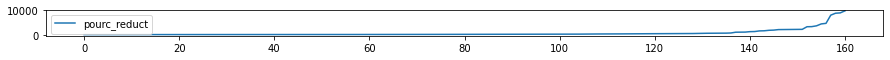

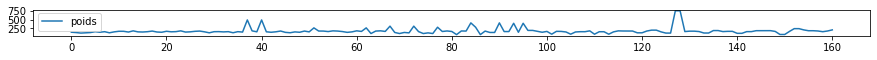

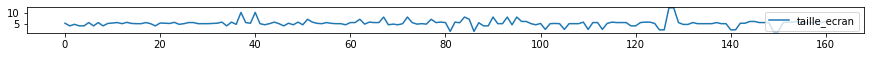

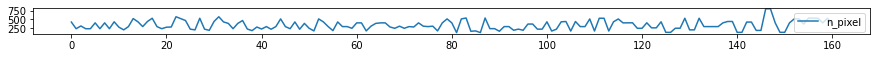

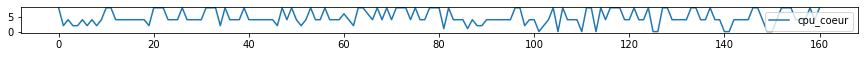

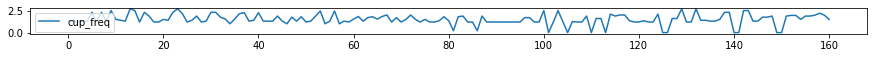

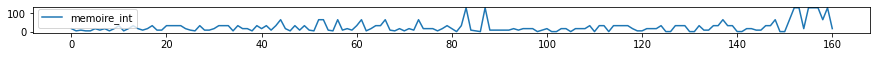

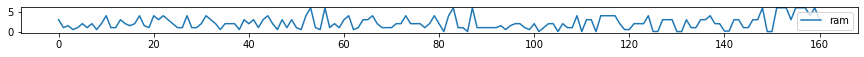

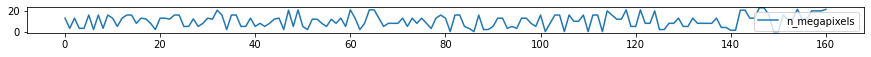

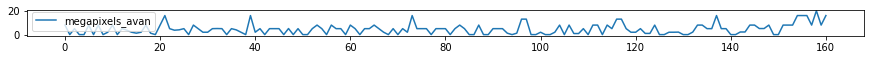

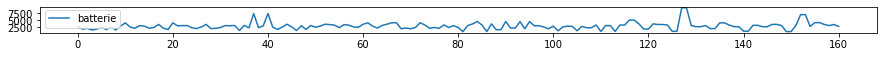

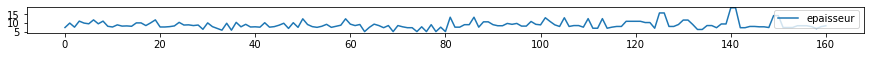

In [8]:
colos=cell.columns
for j,i in enumerate(colos): #range(1,cell.shape[1]):
    fig=plt.figure(figsize=(15,8))
    ax=fig.add_subplot(cell.shape[1],1,j+1)
    ax.plot(cell[[i]],label=colos[j])
    ax.legend()

### 2. Identification  graphique des valeurs aberantes

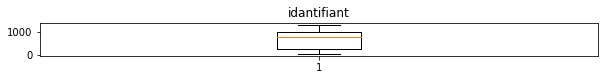

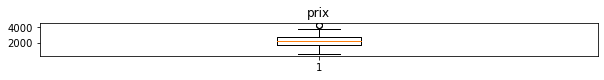

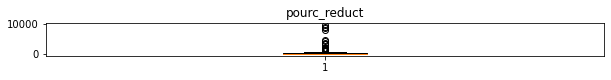

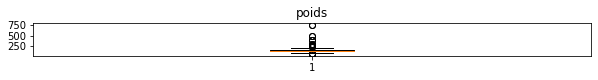

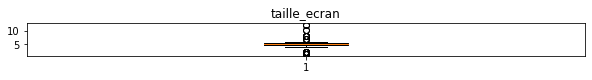

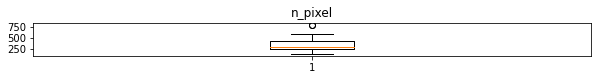

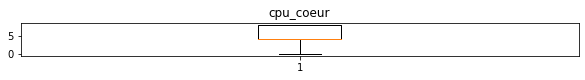

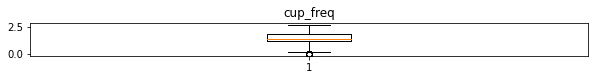

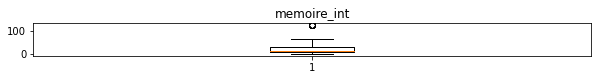

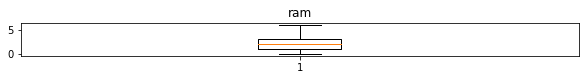

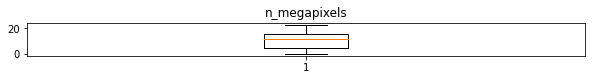

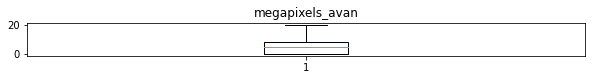

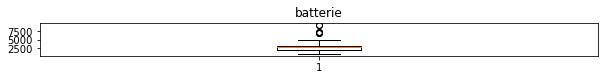

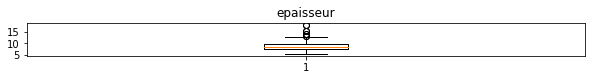

In [9]:
for j,i in enumerate(colos): #range(1,cell.shape[1]):
    fig=plt.figure(figsize=(10,10))
    ax=fig.add_subplot(cell.shape[1],1,j+1)
    ax.boxplot(cell[[i]])
    ax.set_title(f"{colos[j]}")          #,label=colos[j])
    #ax.legend()

Dans cette representation on remarque l'apparution remarquable de valeurs aberantes pour les variables comme l'epaisseur,
taille de l'ecran, poids et pourcentage appliquer avec une faible apparence pour les variables comme la batterie,la memoire interne,frequence CUP, nombres de pixels et le prix tandisque les autres ne presentent pas de valeurs aberantes.

In [10]:
cell.describe()

,idantifiant,prix,pourc_reduct,poids,taille_ecran,n_pixel,cpu_coeur,cup_freq,memoire_int,ram,n_megapixels,megapixels_avan,batterie,epaisseur
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


### 4. correlations entre les variables 

In [11]:
cell.corr()

,idantifiant,prix,pourc_reduct,poids,taille_ecran,n_pixel,cpu_coeur,cup_freq,memoire_int,ram,n_megapixels,megapixels_avan,batterie,epaisseur
idantifiant,1.000000,0.165136,0.218548,0.035869,-0.017817,0.207271,-0.008634,0.092428,0.261186,0.236194,0.172812,0.071020,0.031745,0.039807
prix,0.165136,1.000000,0.273263,0.144555,0.404010,0.817614,0.686811,0.727383,0.776738,0.896915,0.739538,0.675286,0.559946,-0.716773
pourc_reduct,0.218548,0.273263,1.000000,0.016114,0.017154,0.235896,0.069517,0.099133,0.489308,0.373127,0.292164,0.437233,0.120338,-0.047991
poids,0.035869,0.144555,0.016114,1.000000,0.890416,-0.054683,0.216257,0.222730,0.098849,0.149283,-0.029448,-0.005971,0.833783,-0.185262
taille_ecran,-0.017817,0.404010,0.017154,0.890416,1.000000,0.181292,0.472226,0.505454,0.202660,0.327216,0.249892,0.202720,0.843462,-0.533708
n_pixel,0.207271,0.817614,0.235896,-0.054683,0.181292,1.000000,0.487990,0.713168,0.618560,0.748724,0.774008,0.491371,0.302517,-0.496791
cpu_coeur,-0.008634,0.686811,0.069517,0.216257,0.472226,0.487990,1.000000,0.491519,0.276251,0.483128,0.611353,0.586698,0.459728,-0.697935
cup_freq,0.092428,0.727383,0.099133,0.222730,0.505454,0.713168,0.491519,1.000000,0.441400,0.633547,0.625104,0.358319,0.473137,-0.614458
memoire_int,0.261186,0.776738,0.489308,0.098849,0.202660,0.618560,0.276251,0.441400,1.000000,0.875354,0.451917,0.555733,0.461506,-0.367412
ram,0.236194,0.896915,0.373127,0.149283,0.327216,0.748724,0.483128,0.633547,0.875354,1.000000,0.648073,0.647470,0.541001,-0.521074


<AxesSubplot:>

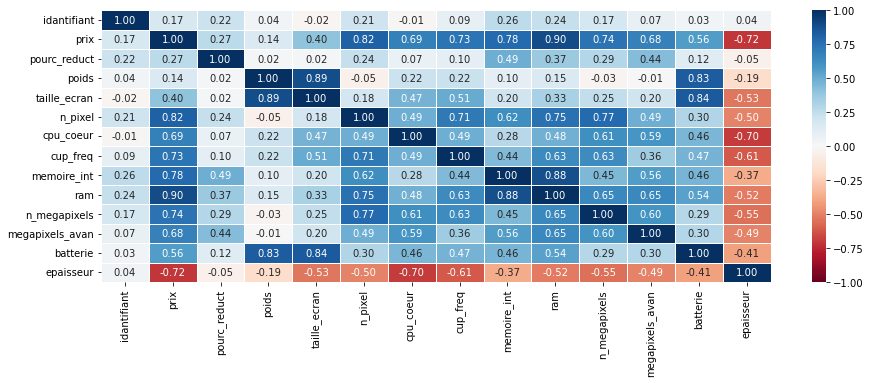

In [12]:
plt.figure(figsize=(15,5))
sns.heatmap(cell.corr(),center=0,cmap='RdBu',
            linewidths=1,annot=True,fmt=".2f",
            vmin=-1,vmax=1)

ce diagramme de correlation ou tableau de correlation  nous montre le degre de correlation qui existe entres l'ensembles des caracteristiques qui determine le telephone.On dit qu'une variable est correle a une  autre lors que la valeur absolue du coefficient de correlation est proche de 1. 

Notre variable cible est le prix du telephone, le diagramme de correlation montre la correlation a differentes niveaux des variables avec le prix excepter l'identifiant. 

ce qui motre que tous les variables excepter l'identifiant sont influant pour la prediction de la variables prix.

### 5. Distubition des variables

In [13]:
def distibution(data):
    for col in data.select_dtypes(include=['float','int']).columns :
        print(f"-----> La skewness de {col.upper()} est de {round(data[col].skew(), 3)}")
        plt.figure(figsize=(12,5))
        
        sns.distplot(data[col])
        plt.title(f"Distribution de {col.upper()}")
        plt.show()

-----> La skewness de IDANTIFIANT est de -0.217


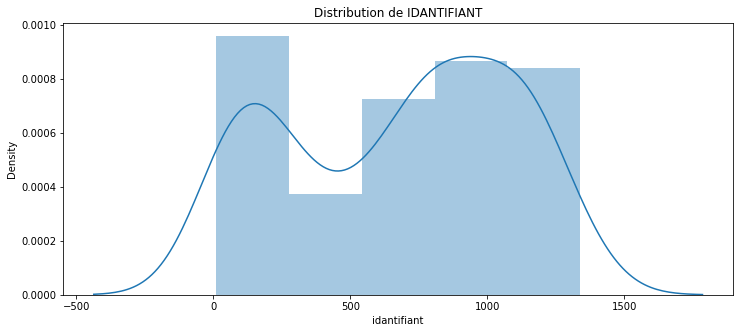

-----> La skewness de PRIX est de 0.052


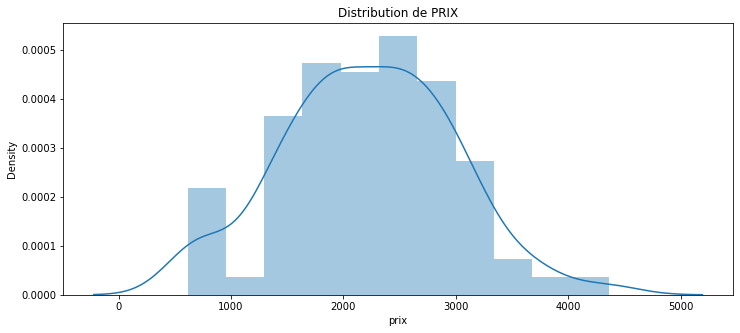

-----> La skewness de POURC_REDUCT est de 4.269


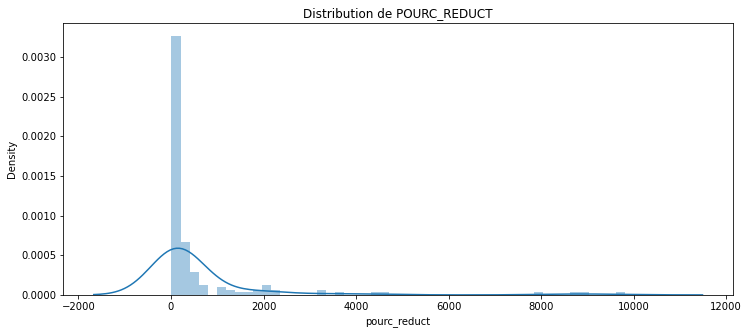

-----> La skewness de POIDS est de 3.982


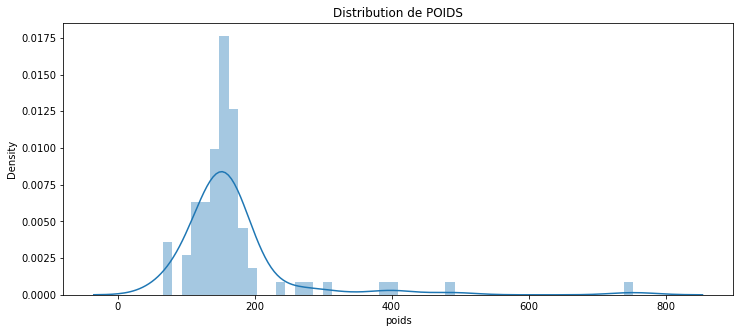

-----> La skewness de TAILLE_ECRAN est de 1.176


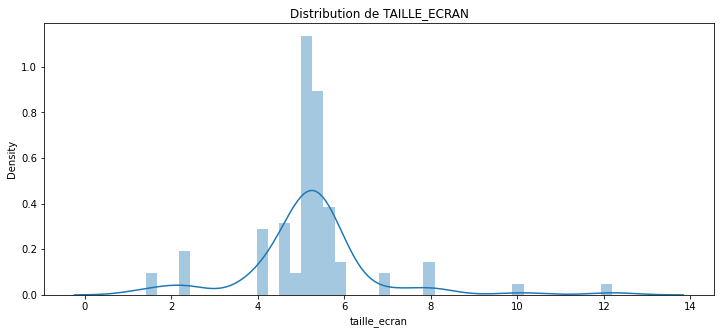

-----> La skewness de N_PIXEL est de 0.603


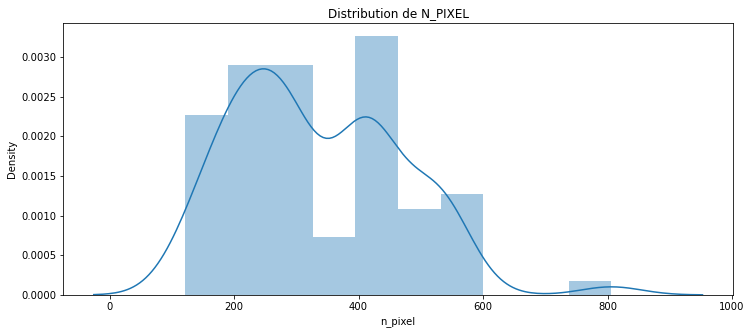

-----> La skewness de CPU_COEUR est de -0.009


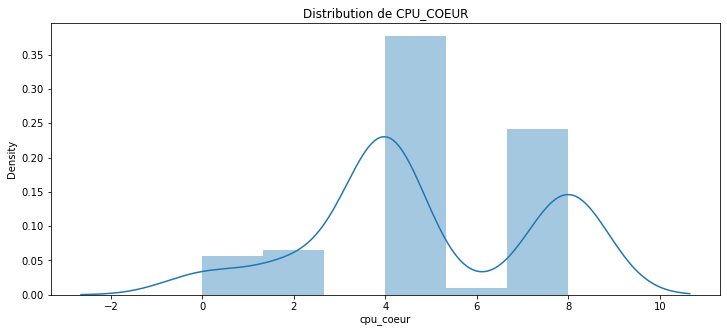

-----> La skewness de CUP_FREQ est de -0.513


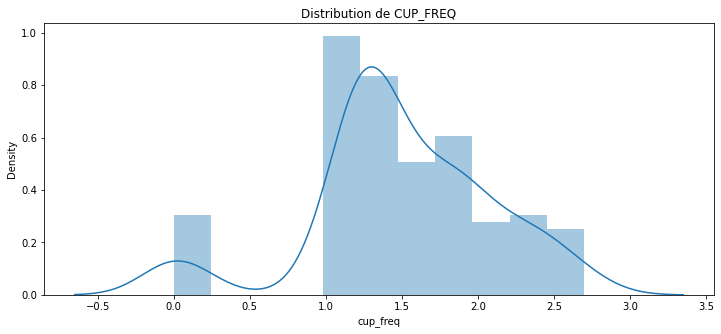

-----> La skewness de MEMOIRE_INT est de 2.39


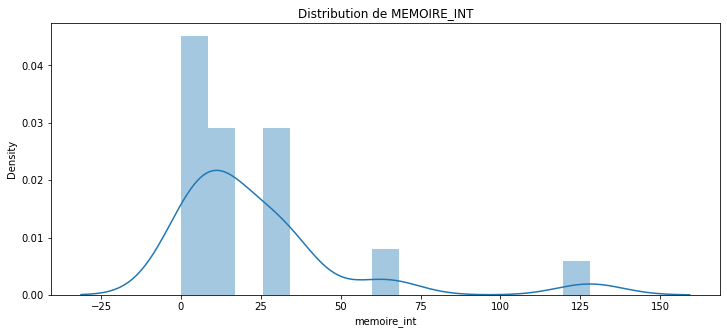

-----> La skewness de RAM est de 0.793


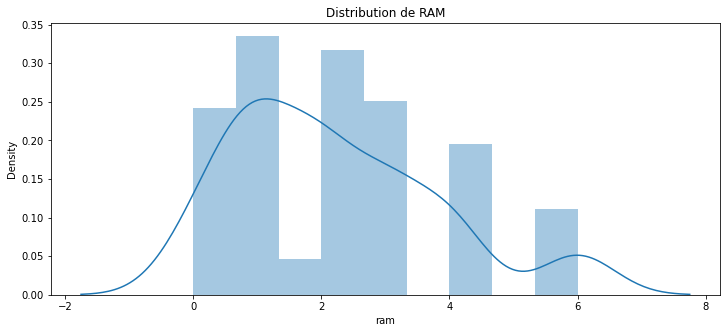

-----> La skewness de N_MEGAPIXELS est de 0.107


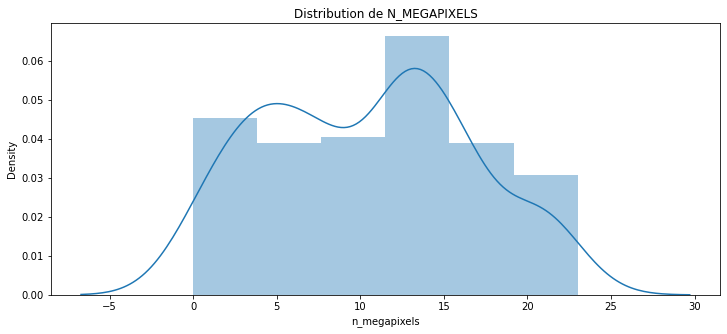

-----> La skewness de MEGAPIXELS_AVAN est de 1.17


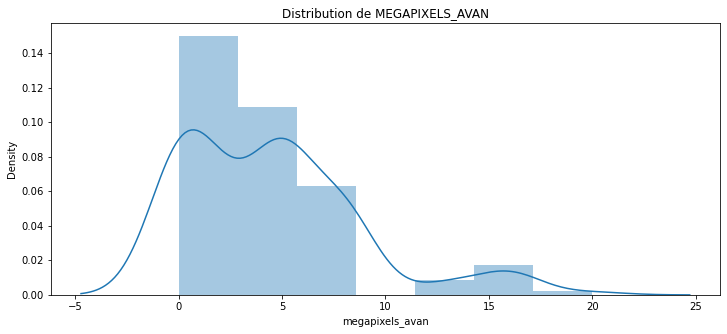

-----> La skewness de BATTERIE est de 2.093


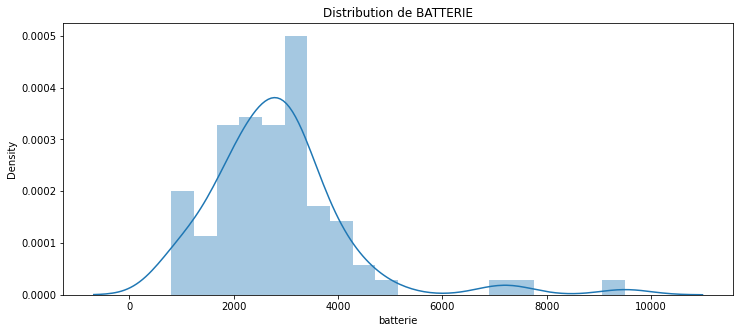

-----> La skewness de EPAISSEUR est de 1.588


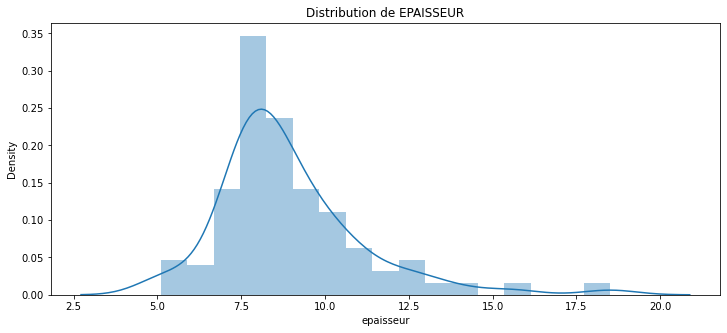

In [14]:
distibution(cell)

Nous constatons avec ces graphes que toute les variables de cette base de données ont une distribution asymétrique excepté la variable Porc_reduct.
De ce fait nous allons effectué une normalisation pour chacune de ces variables.

In [15]:
# NORMALISATION DES DONNEES
from sklearn.preprocessing import MinMaxScaler
normal=MinMaxScaler()
df_normal=normal.fit_transform(cell)

In [16]:
df_normal=pd.DataFrame(df_normal,columns=cell.columns) #shape
df_normal.shape

(161, 14)

-----> La skewness de IDANTIFIANT est de -0.217


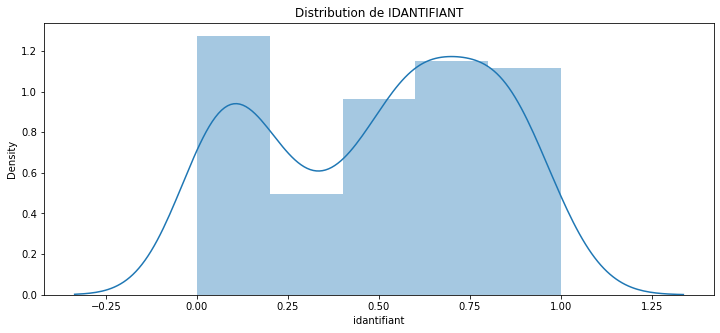

-----> La skewness de PRIX est de 0.052


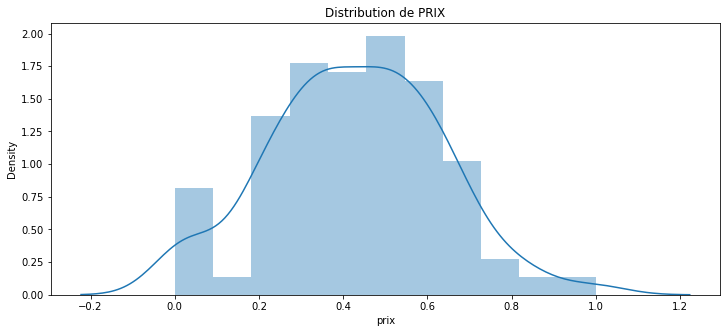

-----> La skewness de POURC_REDUCT est de 4.269


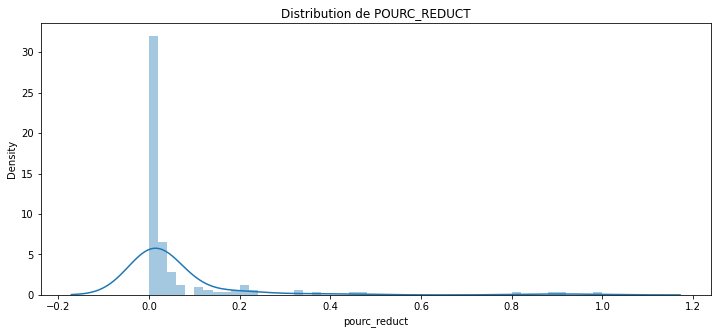

-----> La skewness de POIDS est de 3.982


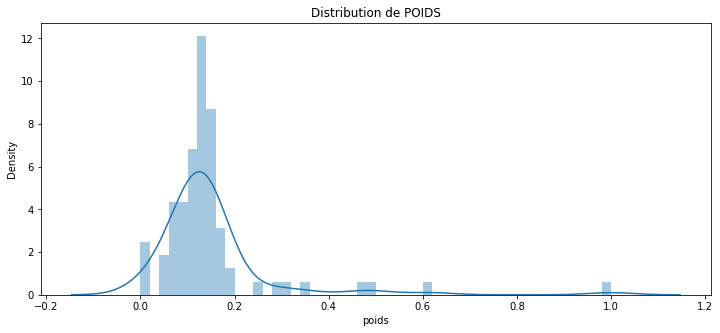

-----> La skewness de TAILLE_ECRAN est de 1.176


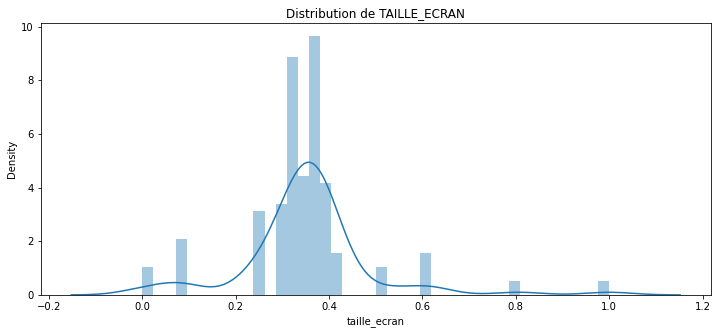

-----> La skewness de N_PIXEL est de 0.603


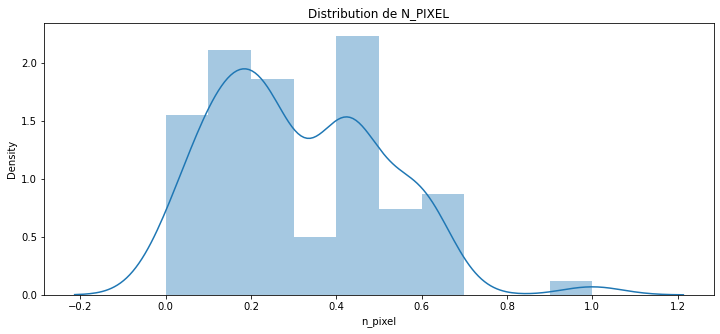

-----> La skewness de CPU_COEUR est de -0.009


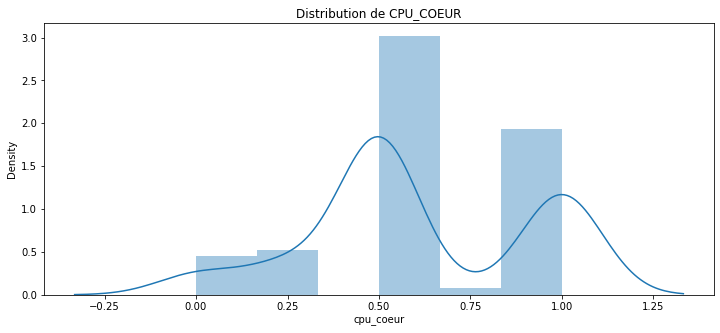

-----> La skewness de CUP_FREQ est de -0.513


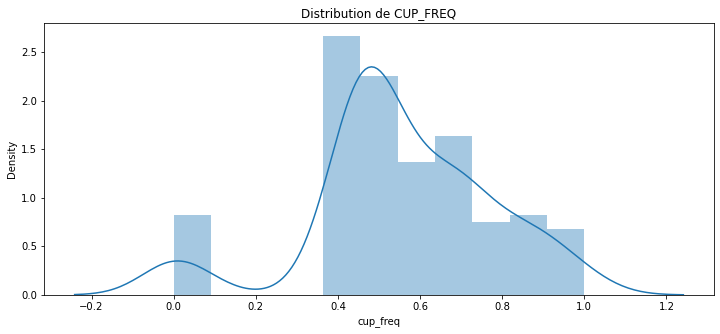

-----> La skewness de MEMOIRE_INT est de 2.39


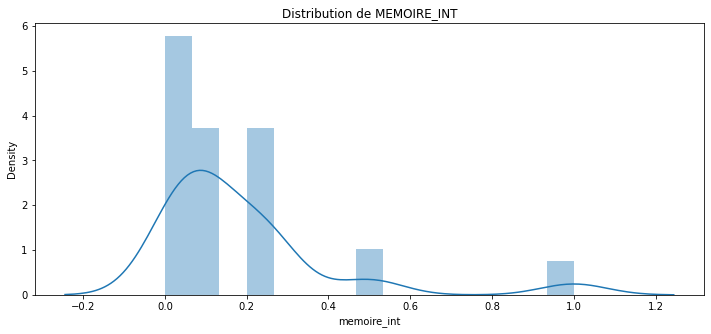

-----> La skewness de RAM est de 0.793


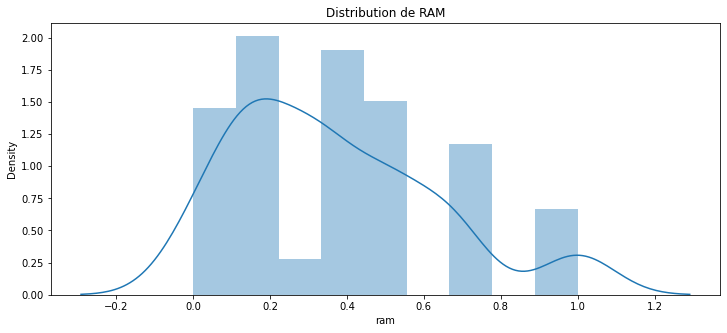

-----> La skewness de N_MEGAPIXELS est de 0.107


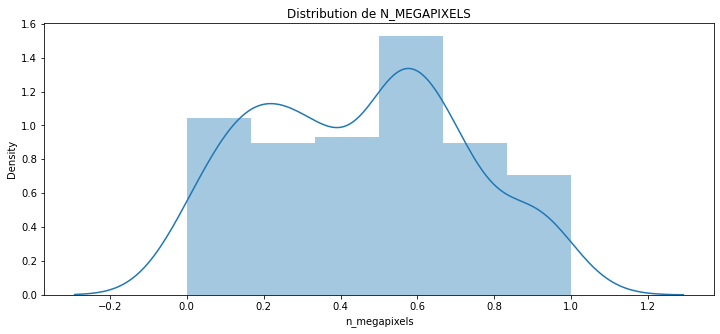

-----> La skewness de MEGAPIXELS_AVAN est de 1.17


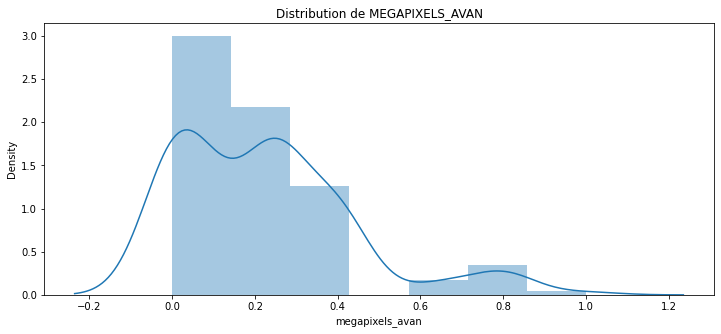

-----> La skewness de BATTERIE est de 2.093


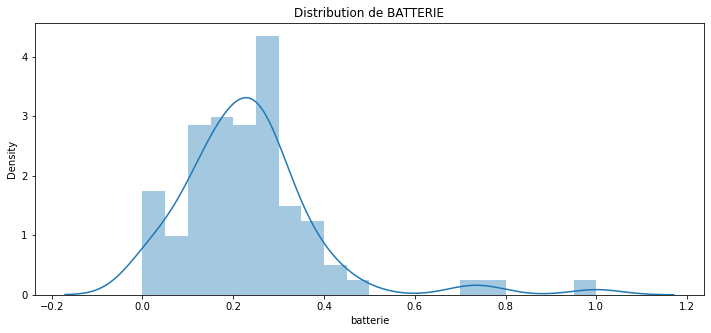

-----> La skewness de EPAISSEUR est de 1.588


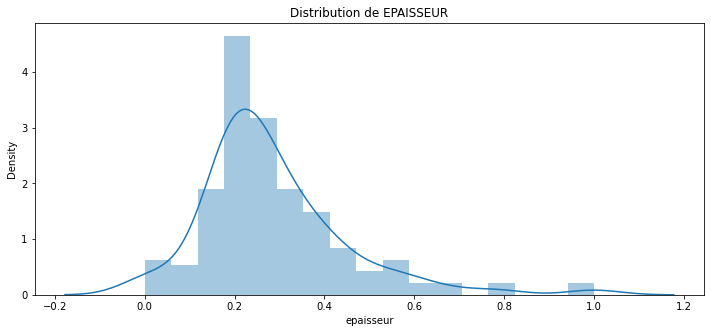

In [17]:
distibution(df_normal)

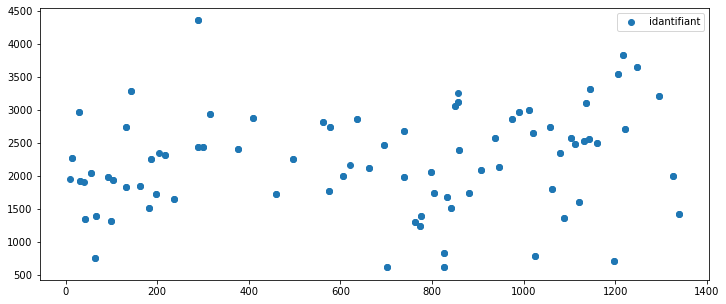

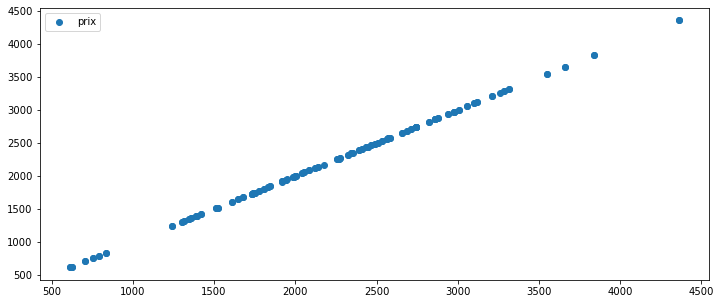

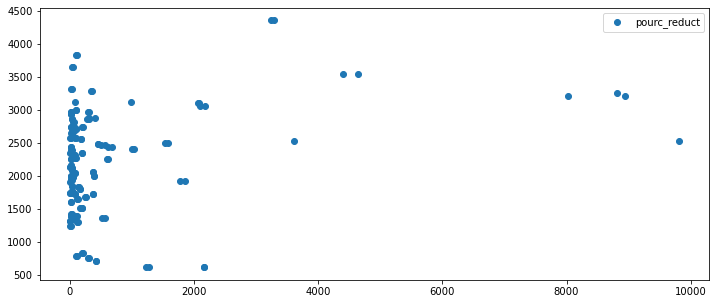

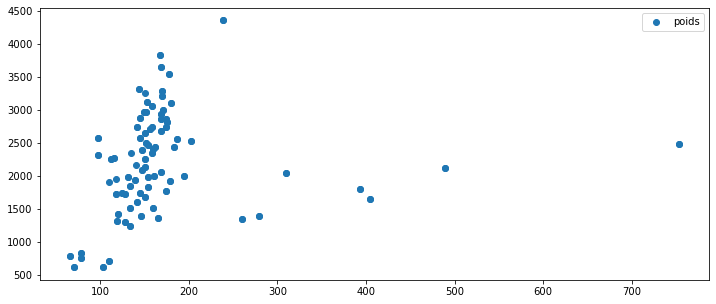

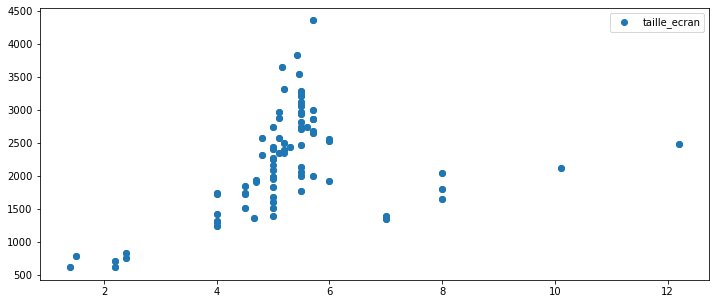

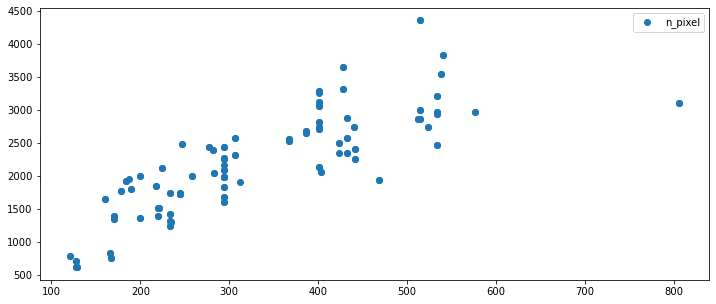

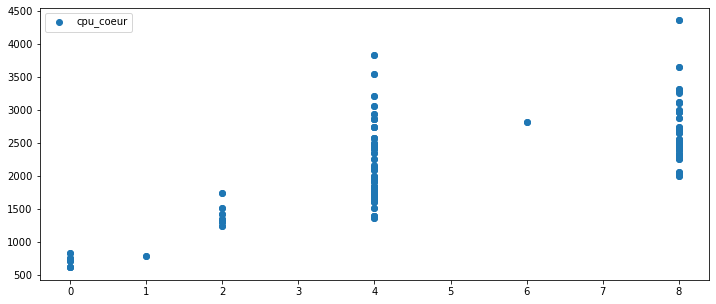

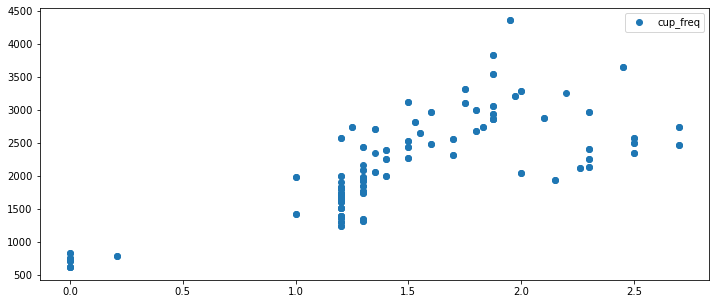

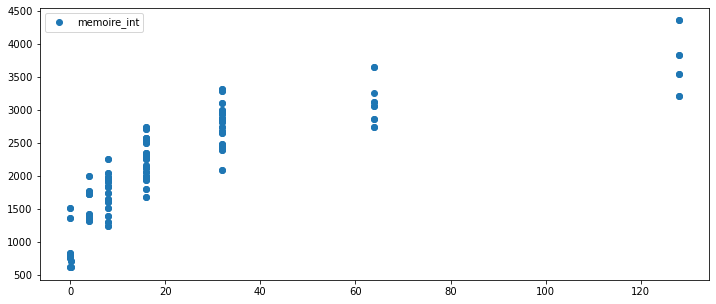

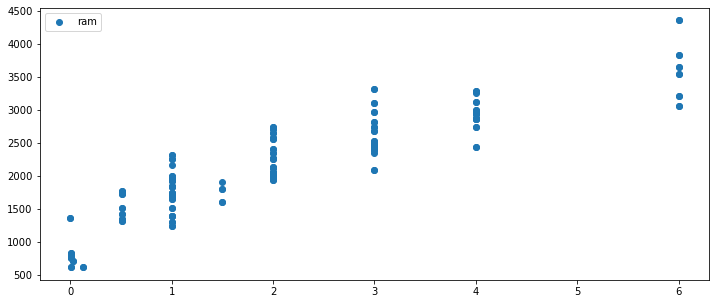

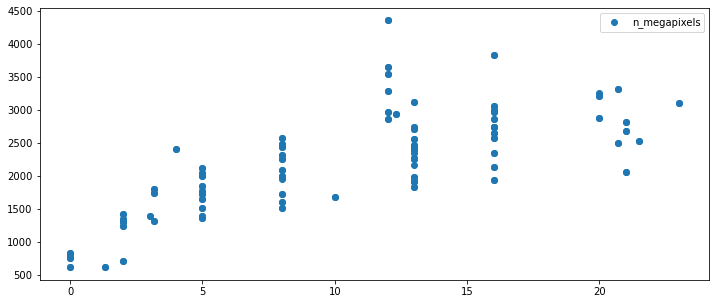

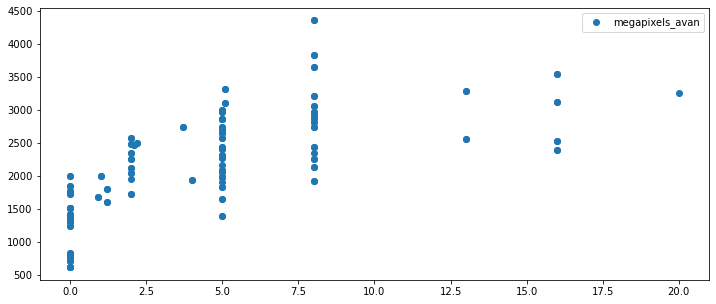

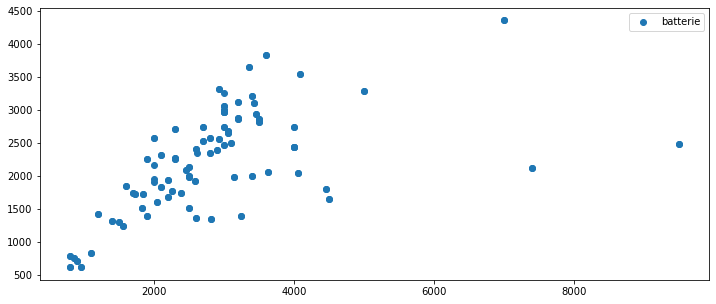

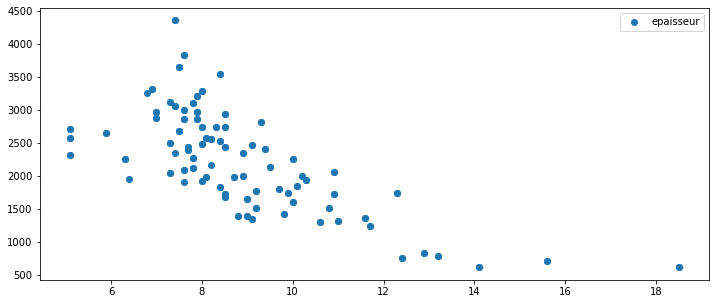

In [24]:

for i in cell.columns:
    plt.figure(figsize=(12,5))
    plt.scatter(cell[[i]],cell[['prix']],label=i)
    plt.legend()


### 6. developpement d'un modele

In [19]:
model=sm.OLS(cell[['prix']],sm.add_constant(cell.drop(cell[['prix']],axis=1))).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   prix   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     236.1
Date:                Sun, 23 Jul 2023   Prob (F-statistic):           2.03e-91
Time:                        17:09:20   Log-Likelihood:                -1049.3
No. Observations:                 161   AIC:                             2127.
Df Residuals:                     147   BIC:                             2170.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1720.1520    219.089     

In [20]:
model2=sm.OLS(cell[['prix']],sm.add_constant(cell.drop(cell[['prix','epaisseur']],axis=1))).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   prix   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     205.9
Date:                Sun, 23 Jul 2023   Prob (F-statistic):           7.68e-86
Time:                        17:09:20   Log-Likelihood:                -1066.3
No. Observations:                 161   AIC:                             2159.
Df Residuals:                     148   BIC:                             2199.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             524.7667     91.769     

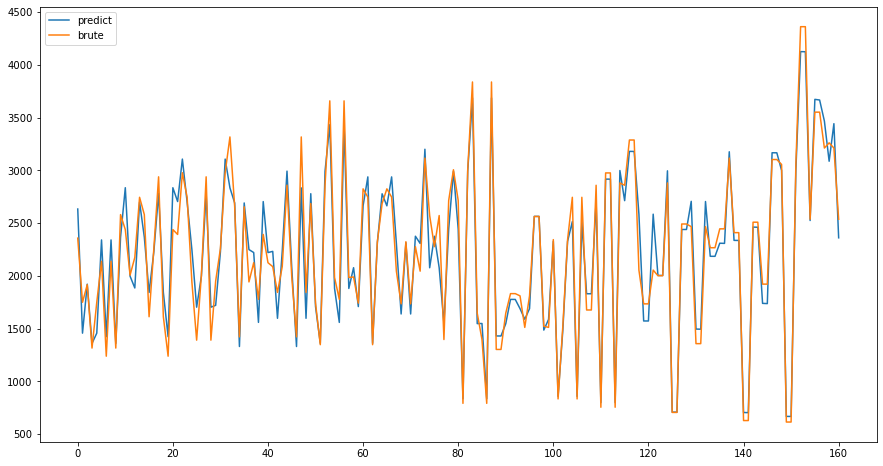

In [25]:
predictions=model2.predict(sm.add_constant(cell.drop(cell[['prix','epaisseur']],axis=1)))
predictions.plot(figsize=(15,8),label='predict')
plt.plot(cell[['prix']],label='brute')
plt.legend()

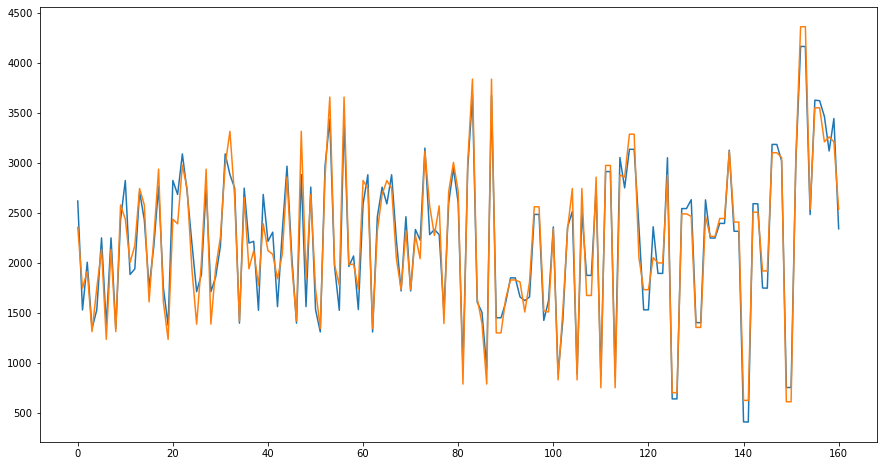

In [22]:
predictions=model.predict(sm.add_constant(cell.drop(cell[['prix']],axis=1)))
predictions.plot(figsize=(15,8))
plt.plot(cell[['prix']])

les resqultats nous montre que tous les variables son importantes pour expliquer le prix